In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# TASK 1: Exploratory Data Analysis

Step 1: Examine the overall picture.

In [156]:

def check_df(dataframe, head):
  print("----- SHAPE -----")
  print(dataframe.shape)
  print("\n----- DTYPES -----")
  print(dataframe.dtypes)
  print("\n----- HEAD -----")
  print(dataframe.head(head))
  print("\n----- TAIL -----")
  print(dataframe.tail(head))
  print("\n----- NA -----")
  print(dataframe.isnull().sum())
  print("\n----- QUANTILES -----")
  print(dataframe.describe([0, 0.25, 0.50, 0.75, 1]).T)
check_df(df, 5)

----- SHAPE -----
(768, 9)

----- DTYPES -----
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

----- HEAD -----
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32

Step 2: Capture the numeric and categorical variables.


In [157]:
def grap_col_names(dataframe, cat_th=600):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]

  cat_cols = cat_cols + num_but_cat

  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f"num_cols: {len(num_cols)}")
  print(f"num_but_cat: {len(num_but_cat)}")

  return cat_cols, num_cols, num_but_cat

cat_cols, num_cols, num_but_cat = grap_col_names(df)

Observations: 768
Variables: 9
cat_cols: 9
num_cols: 0
num_but_cat: 9


Step 3: Analyze the numerical and categorical variables.

    Pregnancies      Ratio
1           135  17.578125
0           111  14.453125
2           103  13.411458
3            75   9.765625
4            68   8.854167
5            57   7.421875
6            50   6.510417
7            45   5.859375
8            38   4.947917
9            28   3.645833
10           24   3.125000
11           11   1.432292
13           10   1.302083
12            9   1.171875
14            2   0.260417
15            1   0.130208
17            1   0.130208
----------------------------------------


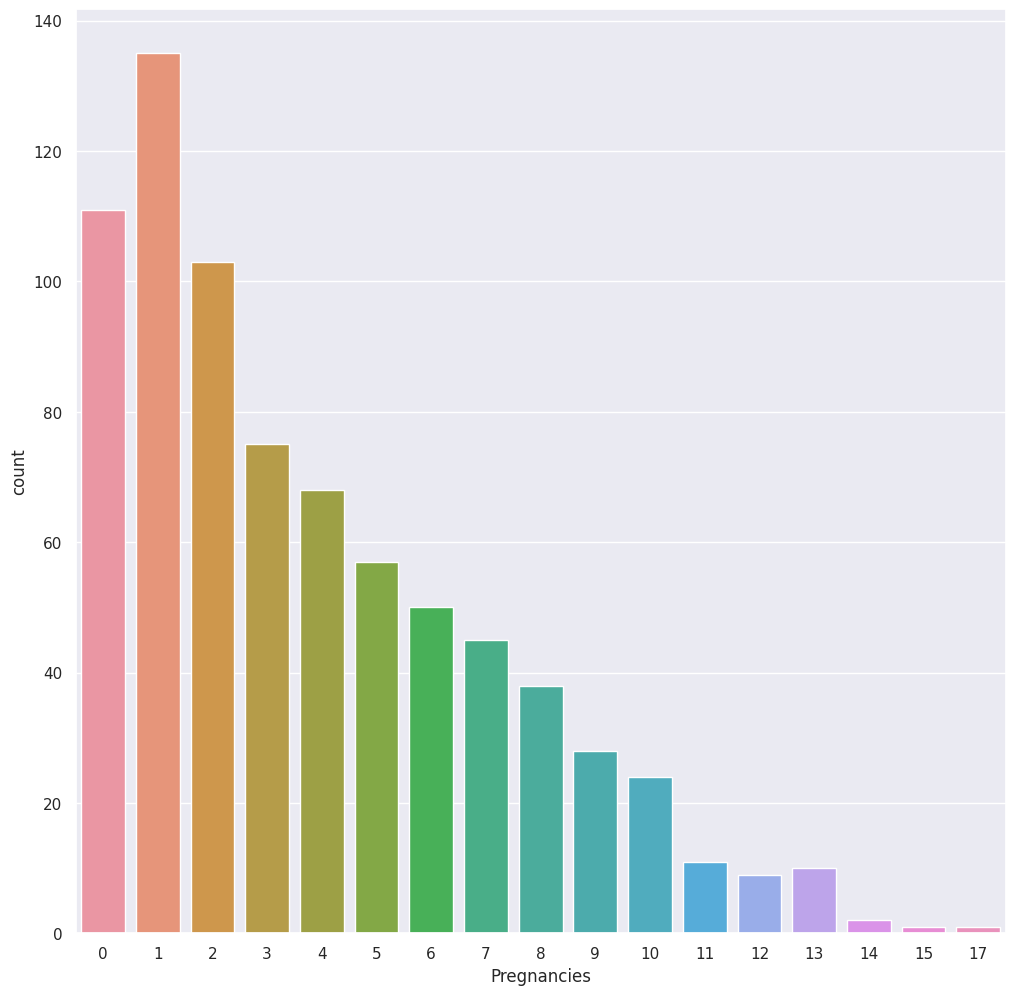

     Glucose     Ratio
99        17  2.213542
100       17  2.213542
111       14  1.822917
129       14  1.822917
125       14  1.822917
..       ...       ...
191        1  0.130208
177        1  0.130208
44         1  0.130208
62         1  0.130208
190        1  0.130208

[136 rows x 2 columns]
----------------------------------------


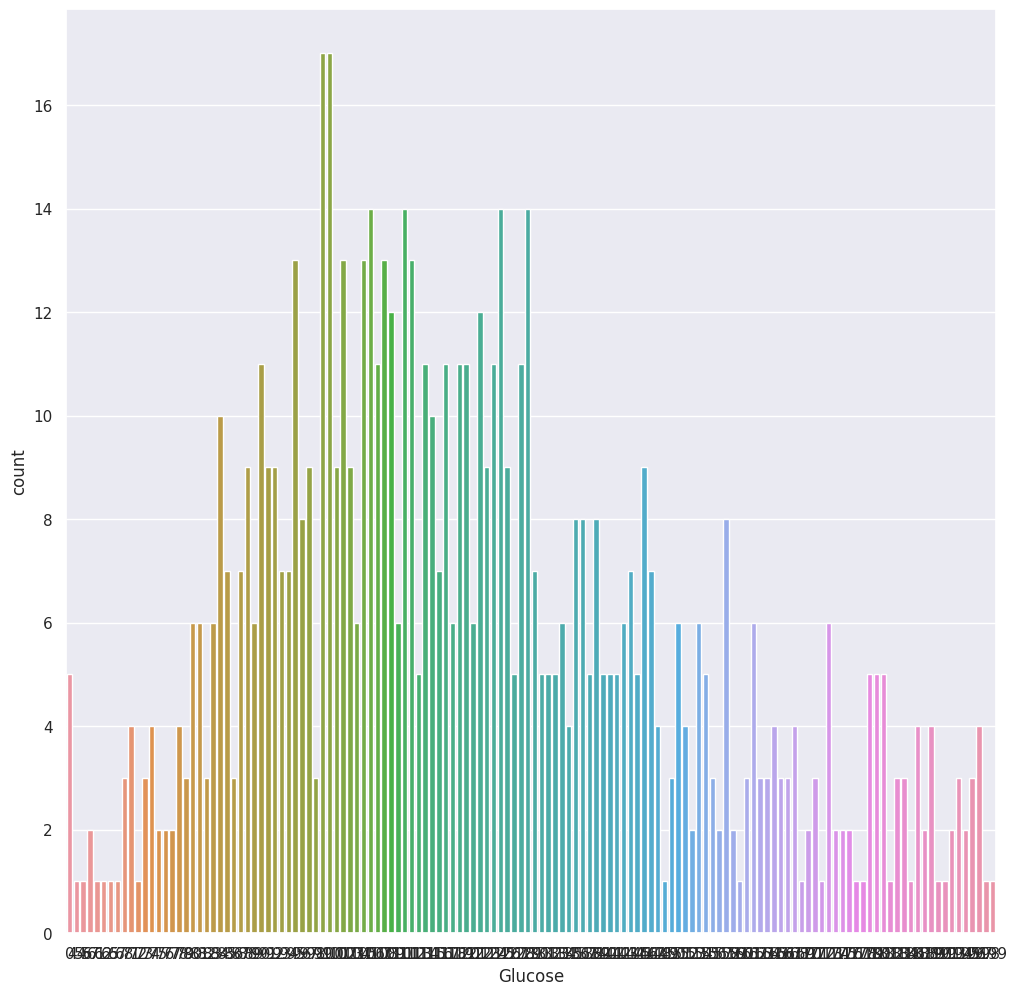

     BloodPressure     Ratio
70              57  7.421875
74              52  6.770833
78              45  5.859375
68              45  5.859375
72              44  5.729167
64              43  5.598958
80              40  5.208333
76              39  5.078125
60              37  4.817708
0               35  4.557292
62              34  4.427083
66              30  3.906250
82              30  3.906250
88              25  3.255208
84              23  2.994792
90              22  2.864583
86              21  2.734375
58              21  2.734375
50              13  1.692708
56              12  1.562500
52              11  1.432292
54              11  1.432292
75               8  1.041667
92               8  1.041667
65               7  0.911458
85               6  0.781250
94               6  0.781250
48               5  0.651042
96               4  0.520833
44               4  0.520833
100              3  0.390625
106              3  0.390625
98               3  0.390625
110           

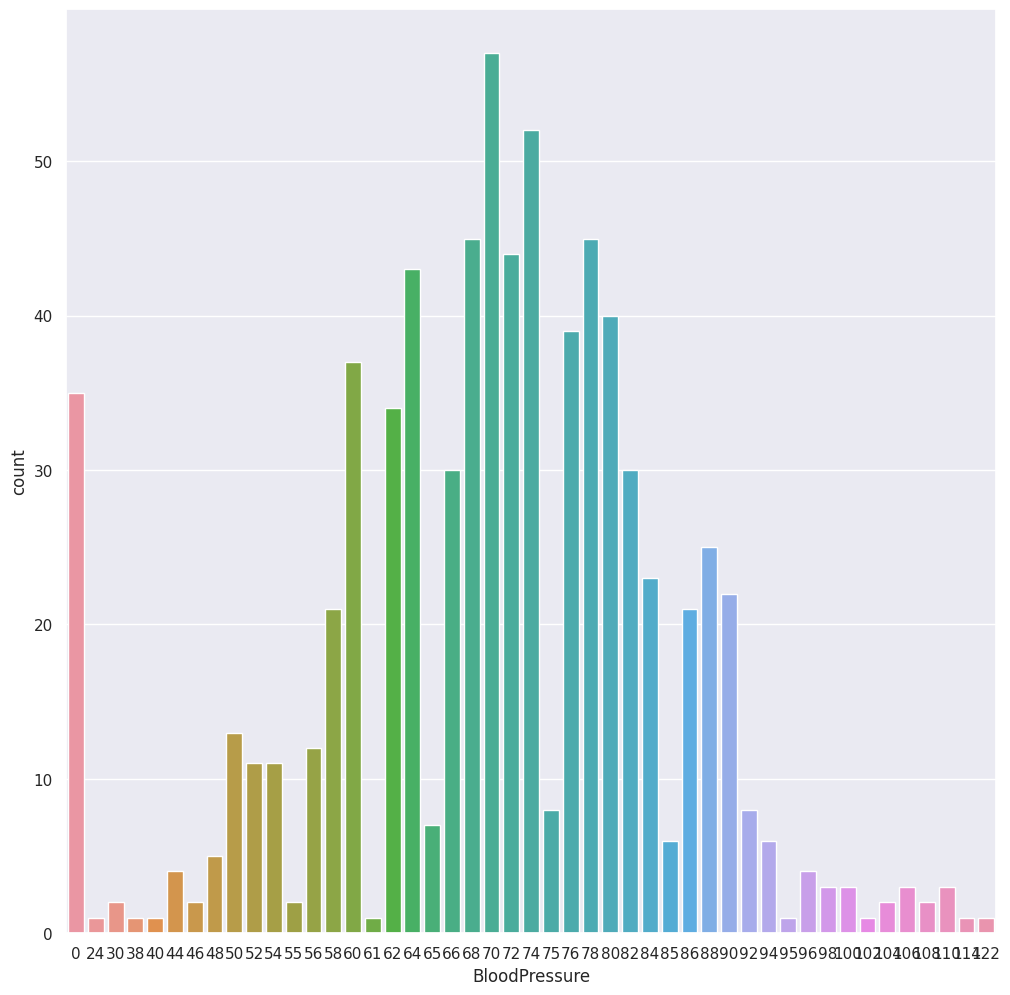

    SkinThickness      Ratio
0             227  29.557292
32             31   4.036458
30             27   3.515625
27             23   2.994792
23             22   2.864583
33             20   2.604167
28             20   2.604167
18             20   2.604167
31             19   2.473958
19             18   2.343750
39             18   2.343750
29             17   2.213542
40             16   2.083333
25             16   2.083333
26             16   2.083333
22             16   2.083333
37             16   2.083333
41             15   1.953125
35             15   1.953125
36             14   1.822917
15             14   1.822917
17             14   1.822917
20             13   1.692708
24             12   1.562500
42             11   1.432292
13             11   1.432292
21             10   1.302083
46              8   1.041667
34              8   1.041667
12              7   0.911458
38              7   0.911458
11              6   0.781250
43              6   0.781250
16            

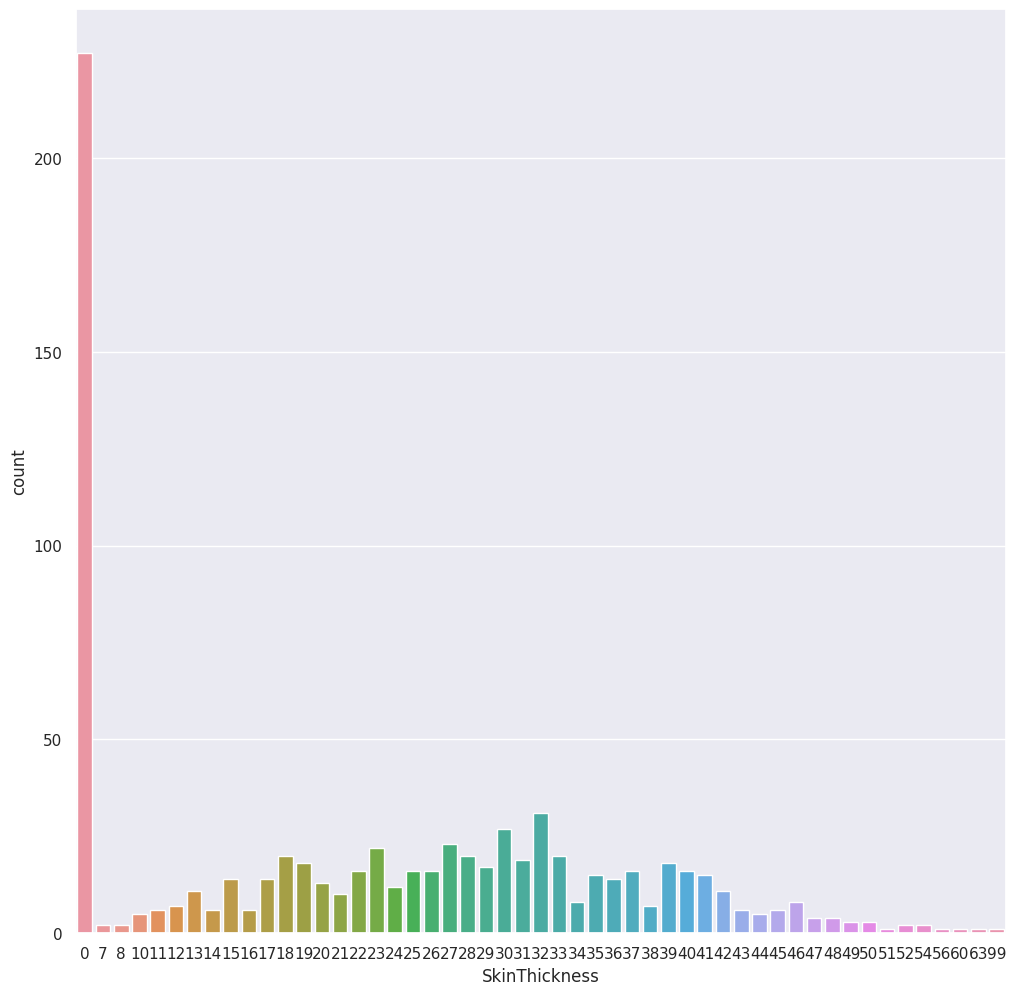

     Insulin      Ratio
0        374  48.697917
105       11   1.432292
130        9   1.171875
140        9   1.171875
120        8   1.041667
..       ...        ...
73         1   0.130208
171        1   0.130208
255        1   0.130208
52         1   0.130208
112        1   0.130208

[186 rows x 2 columns]
----------------------------------------


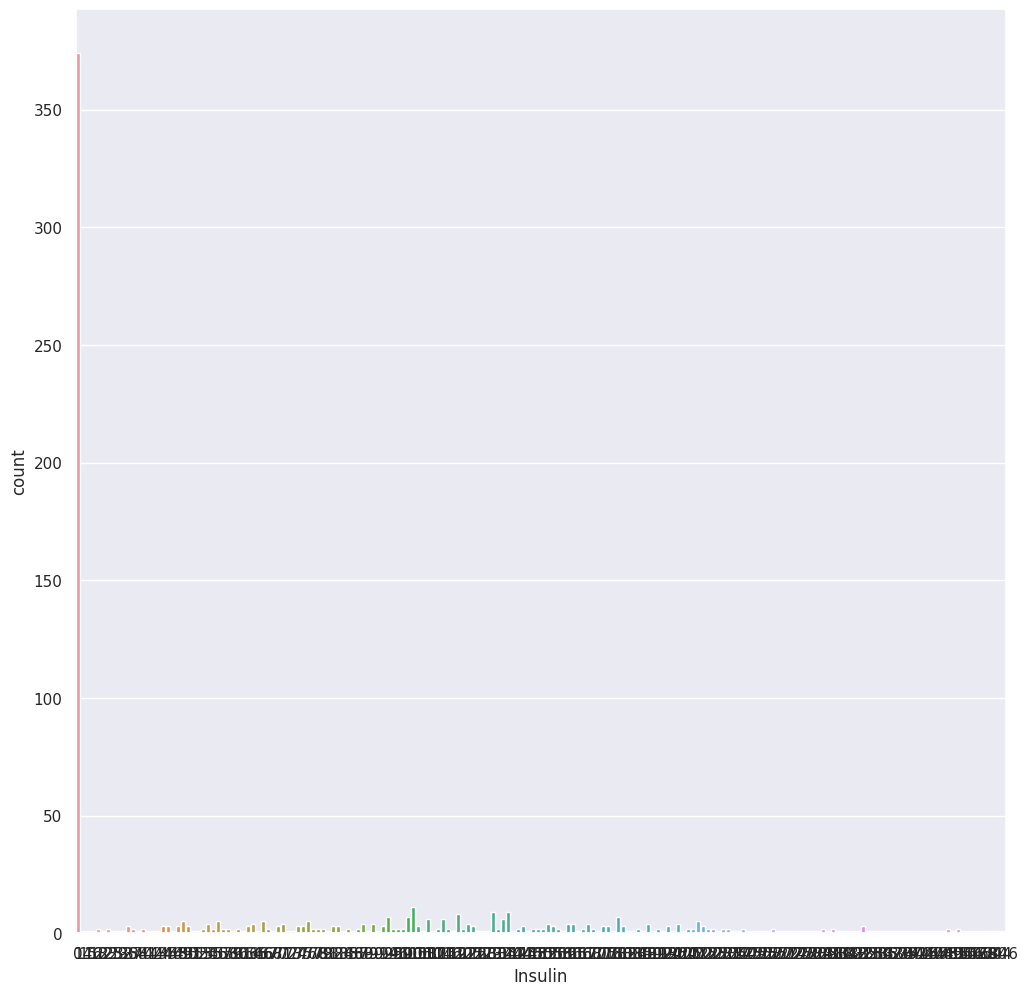

      BMI     Ratio
32.0   13  1.692708
31.6   12  1.562500
31.2   12  1.562500
0.0    11  1.432292
32.4   10  1.302083
...   ...       ...
36.7    1  0.130208
41.8    1  0.130208
42.6    1  0.130208
42.8    1  0.130208
46.3    1  0.130208

[248 rows x 2 columns]
----------------------------------------


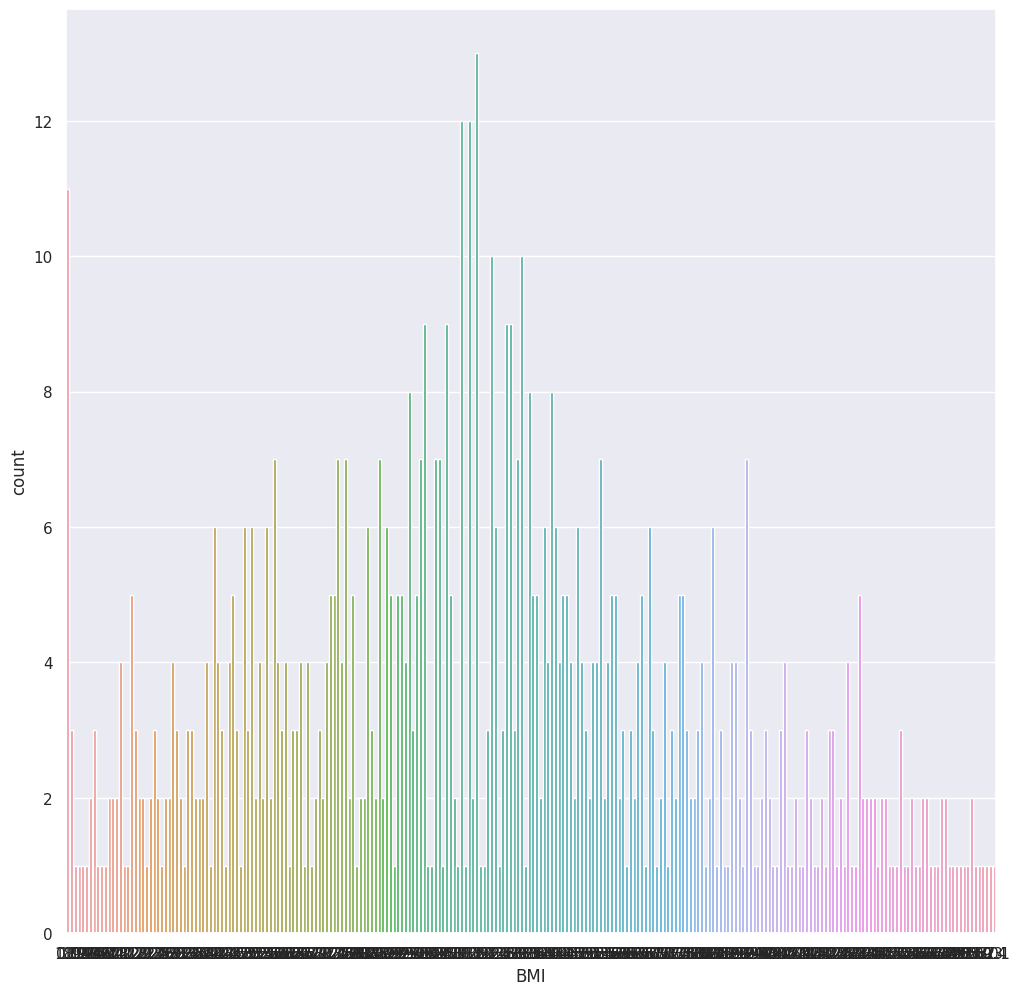

       DiabetesPedigreeFunction     Ratio
0.258                         6  0.781250
0.254                         6  0.781250
0.268                         5  0.651042
0.207                         5  0.651042
0.261                         5  0.651042
...                         ...       ...
1.353                         1  0.130208
0.655                         1  0.130208
0.092                         1  0.130208
0.926                         1  0.130208
0.171                         1  0.130208

[517 rows x 2 columns]
----------------------------------------


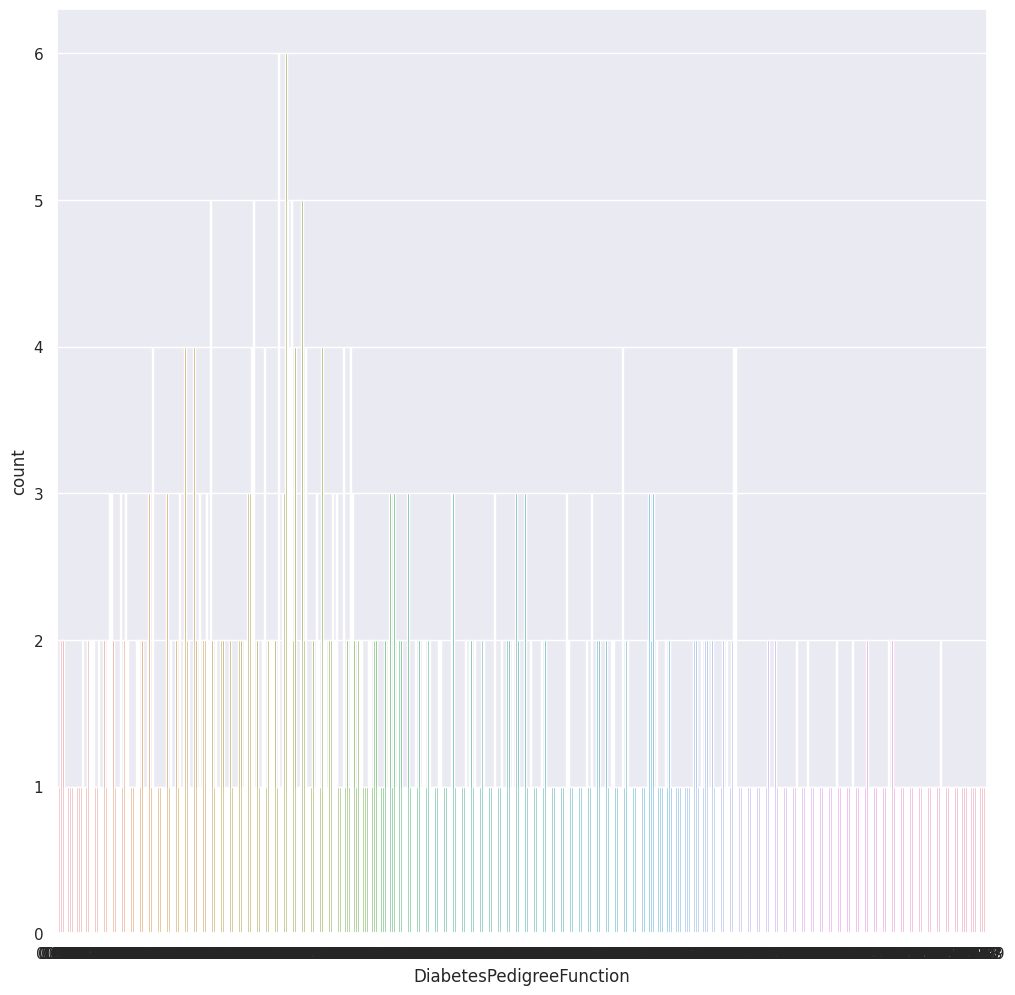

    Age     Ratio
22   72  9.375000
21   63  8.203125
25   48  6.250000
24   46  5.989583
23   38  4.947917
28   35  4.557292
26   33  4.296875
27   32  4.166667
29   29  3.776042
31   24  3.125000
41   22  2.864583
30   21  2.734375
37   19  2.473958
42   18  2.343750
33   17  2.213542
38   16  2.083333
36   16  2.083333
32   16  2.083333
45   15  1.953125
34   14  1.822917
46   13  1.692708
43   13  1.692708
40   13  1.692708
39   12  1.562500
35   10  1.302083
50    8  1.041667
51    8  1.041667
52    8  1.041667
44    8  1.041667
58    7  0.911458
47    6  0.781250
54    6  0.781250
49    5  0.651042
48    5  0.651042
57    5  0.651042
53    5  0.651042
60    5  0.651042
66    4  0.520833
63    4  0.520833
62    4  0.520833
55    4  0.520833
67    3  0.390625
56    3  0.390625
59    3  0.390625
65    3  0.390625
69    2  0.260417
61    2  0.260417
72    1  0.130208
81    1  0.130208
64    1  0.130208
70    1  0.130208
68    1  0.130208
----------------------------------------


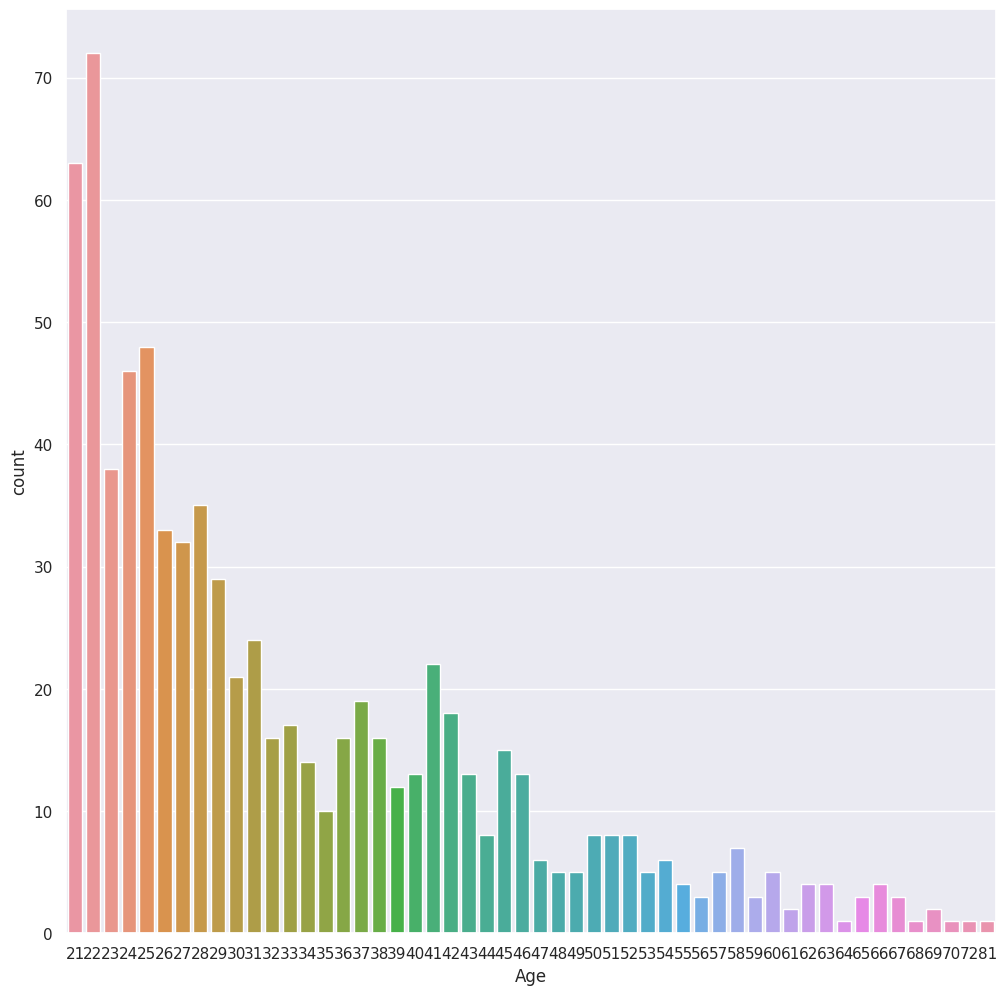

   Outcome      Ratio
0      500  65.104167
1      268  34.895833
----------------------------------------


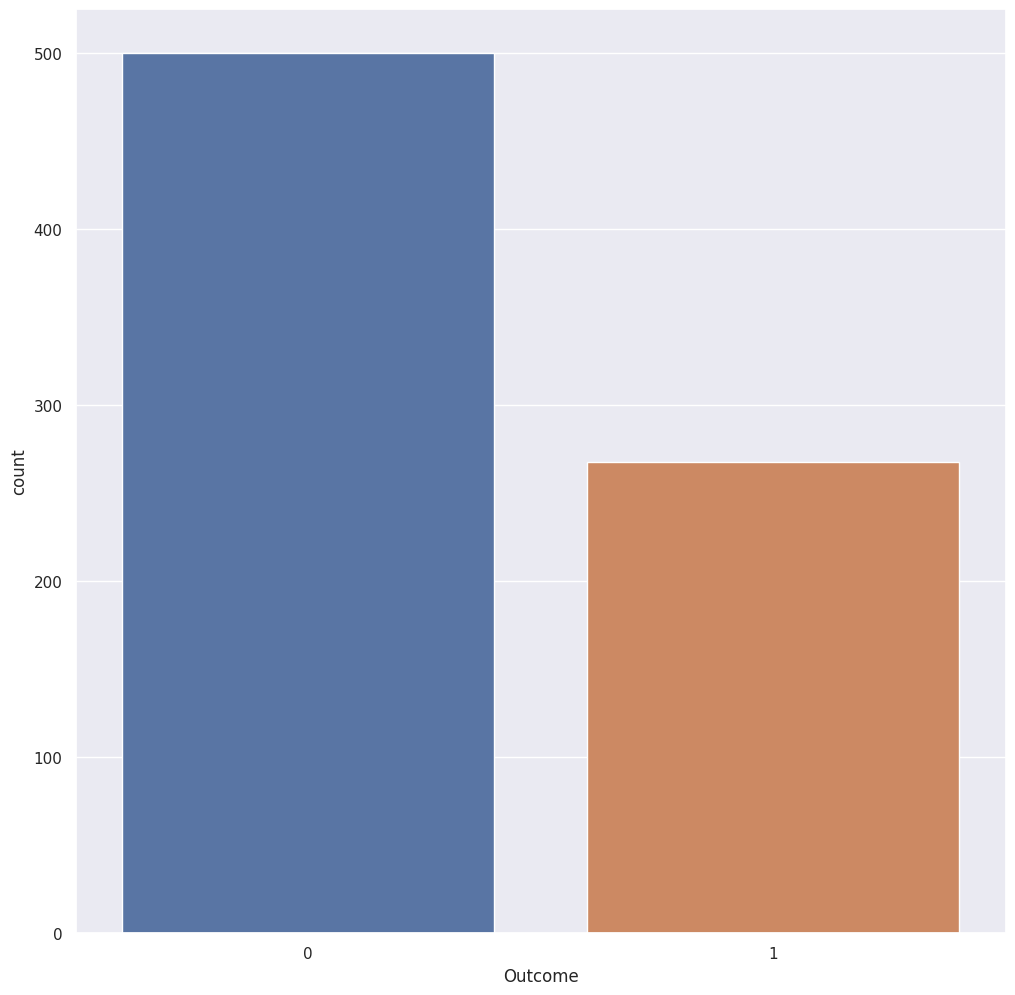

In [158]:
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("----------------------------------------")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show(block=True)

for col in num_but_cat:
  cat_summary(df, col, True)

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: Pregnancies, dtype: float64


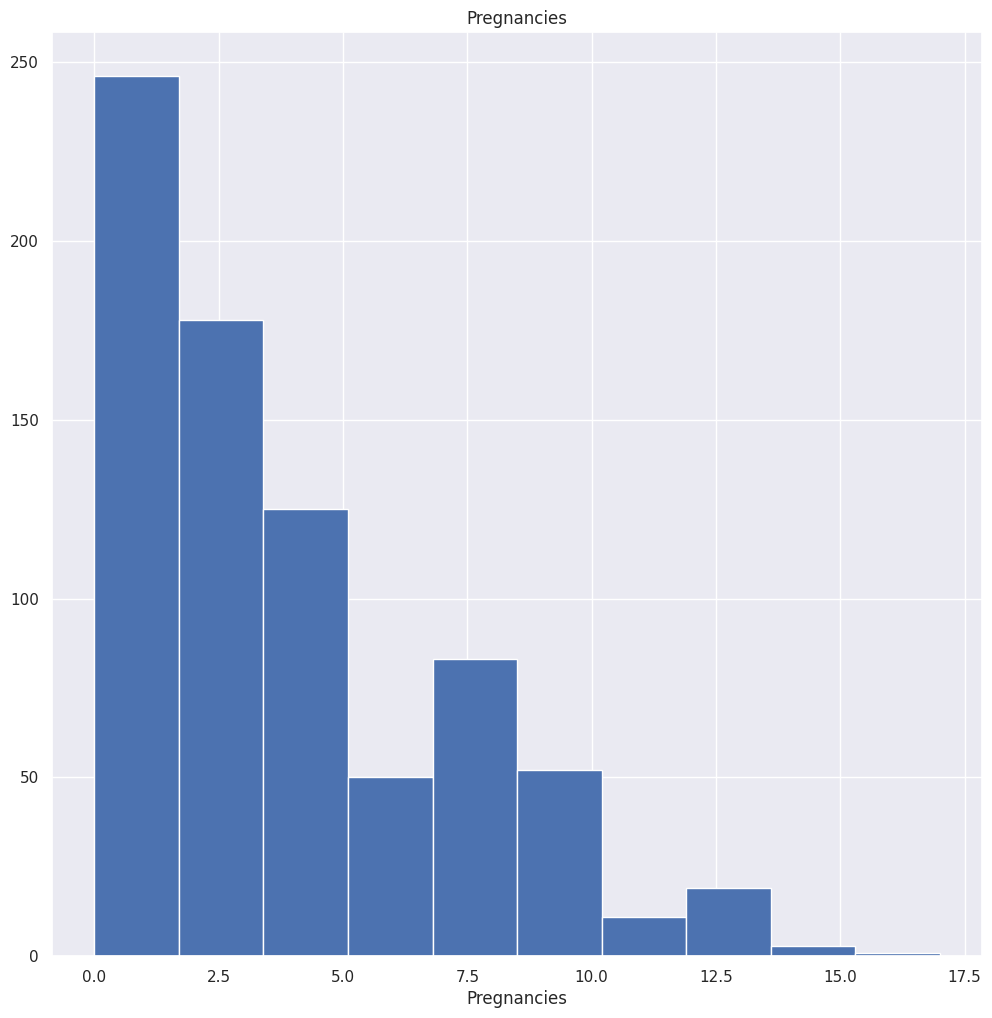

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: Glucose, dtype: float64


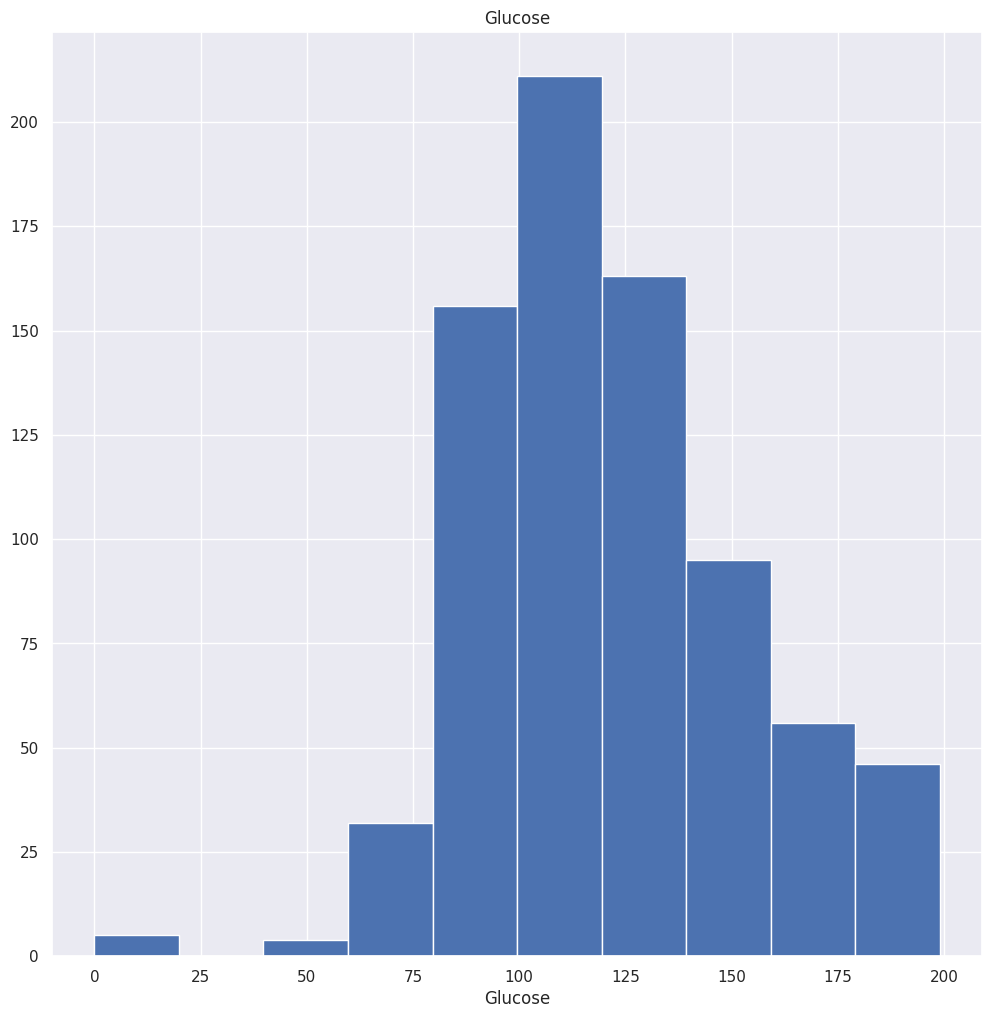

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       90.000000
99%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64


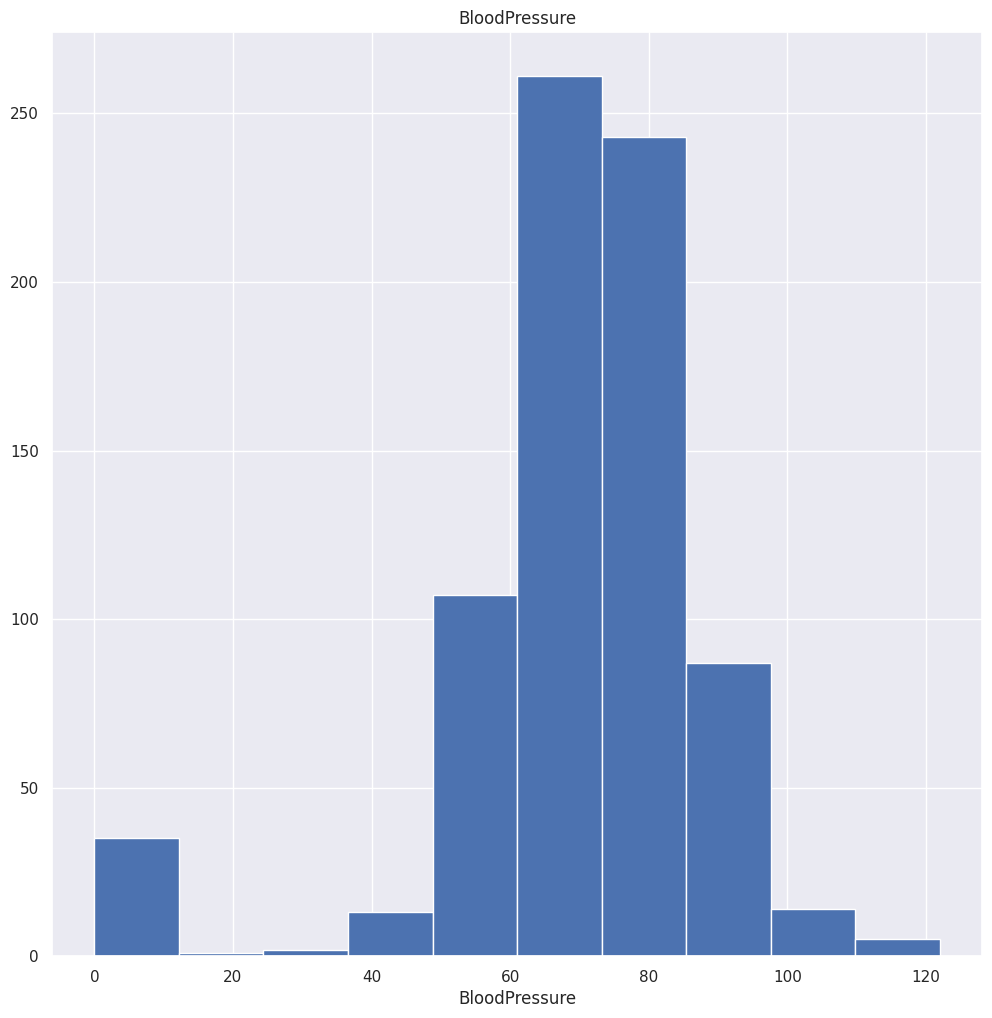

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
95%       44.000000
99%       51.330000
max       99.000000
Name: SkinThickness, dtype: float64


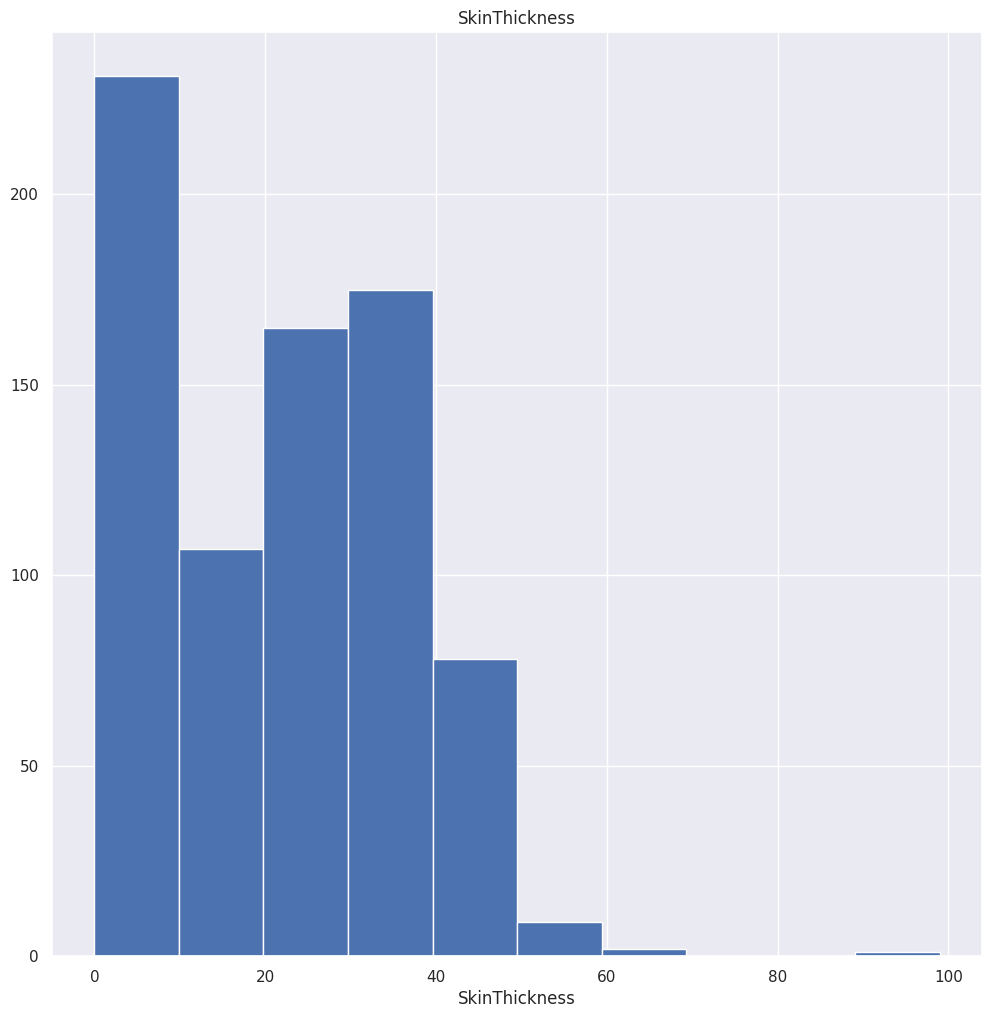

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
95%      293.000000
99%      519.900000
max      846.000000
Name: Insulin, dtype: float64


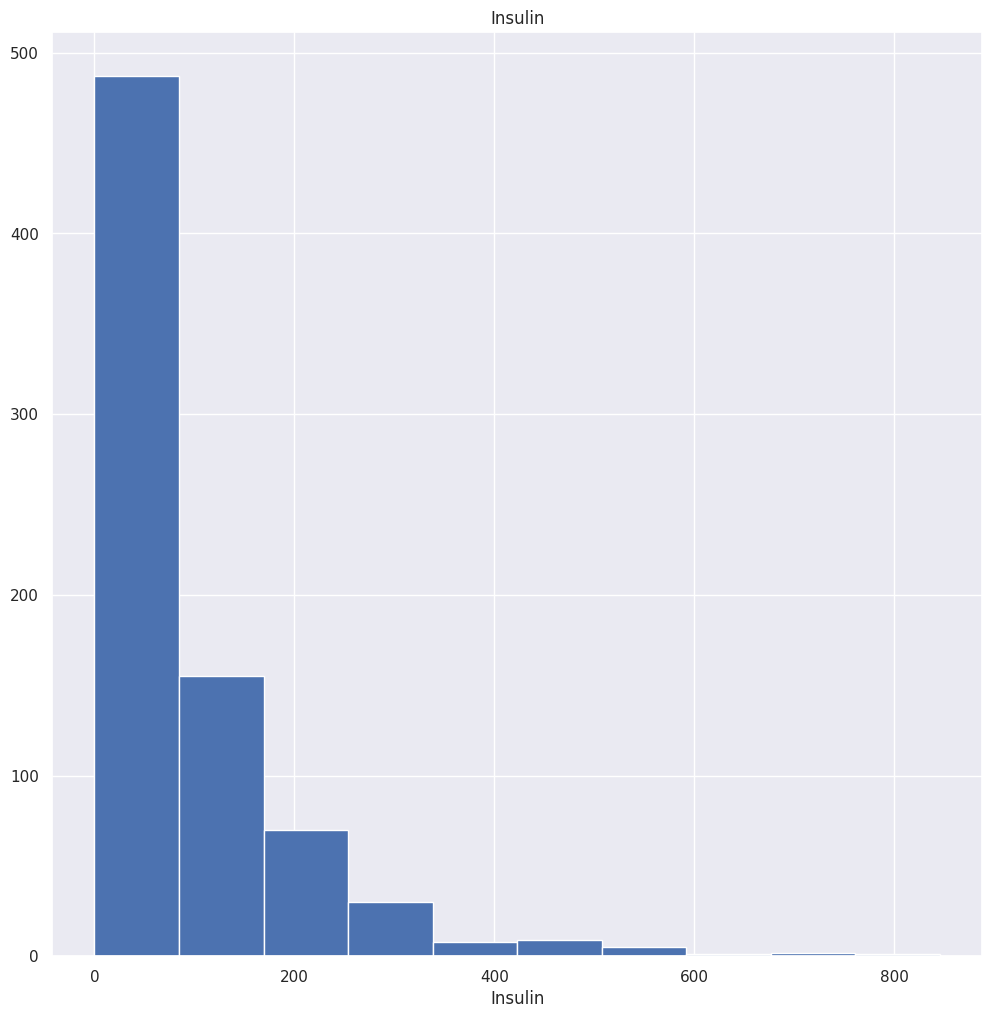

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
5%        21.800000
10%       23.600000
20%       25.900000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
95%       44.395000
99%       50.759000
max       67.100000
Name: BMI, dtype: float64


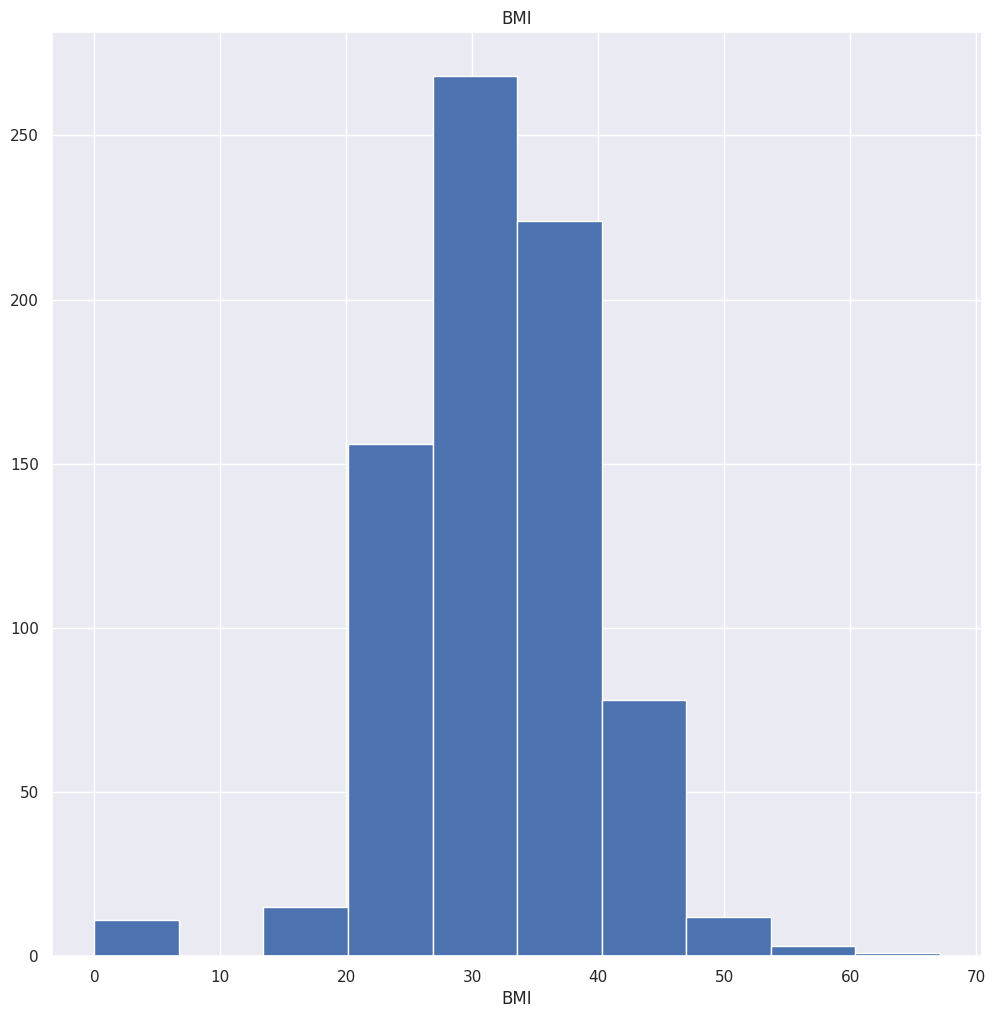

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


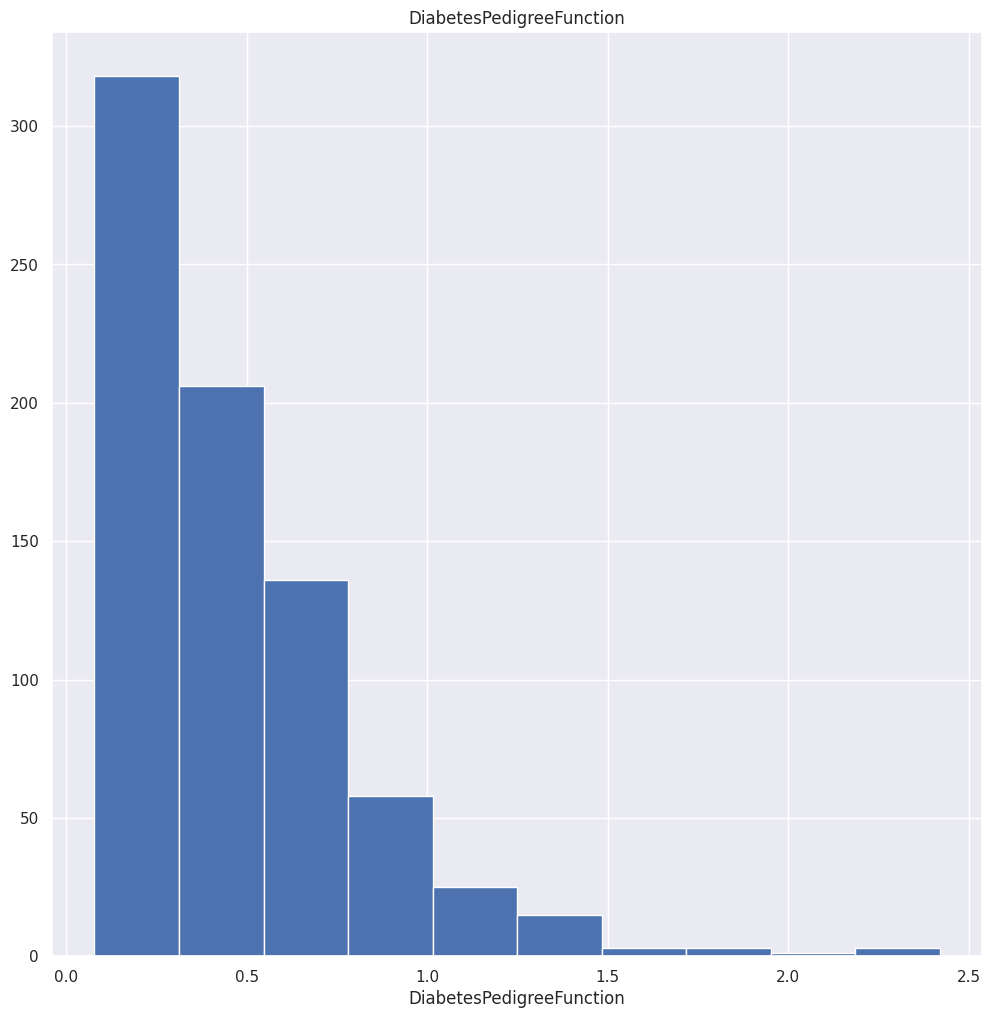

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: Age, dtype: float64


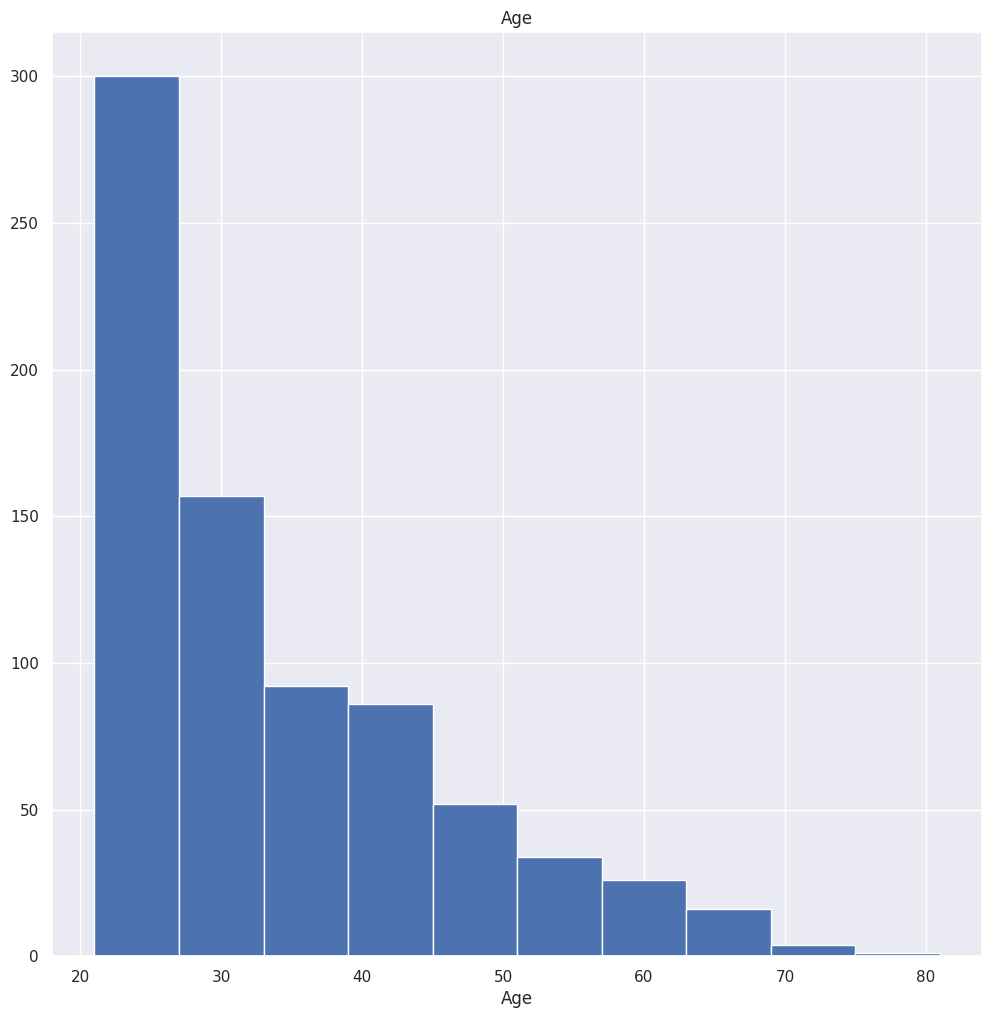

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        1.000000
80%        1.000000
90%        1.000000
95%        1.000000
99%        1.000000
max        1.000000
Name: Outcome, dtype: float64


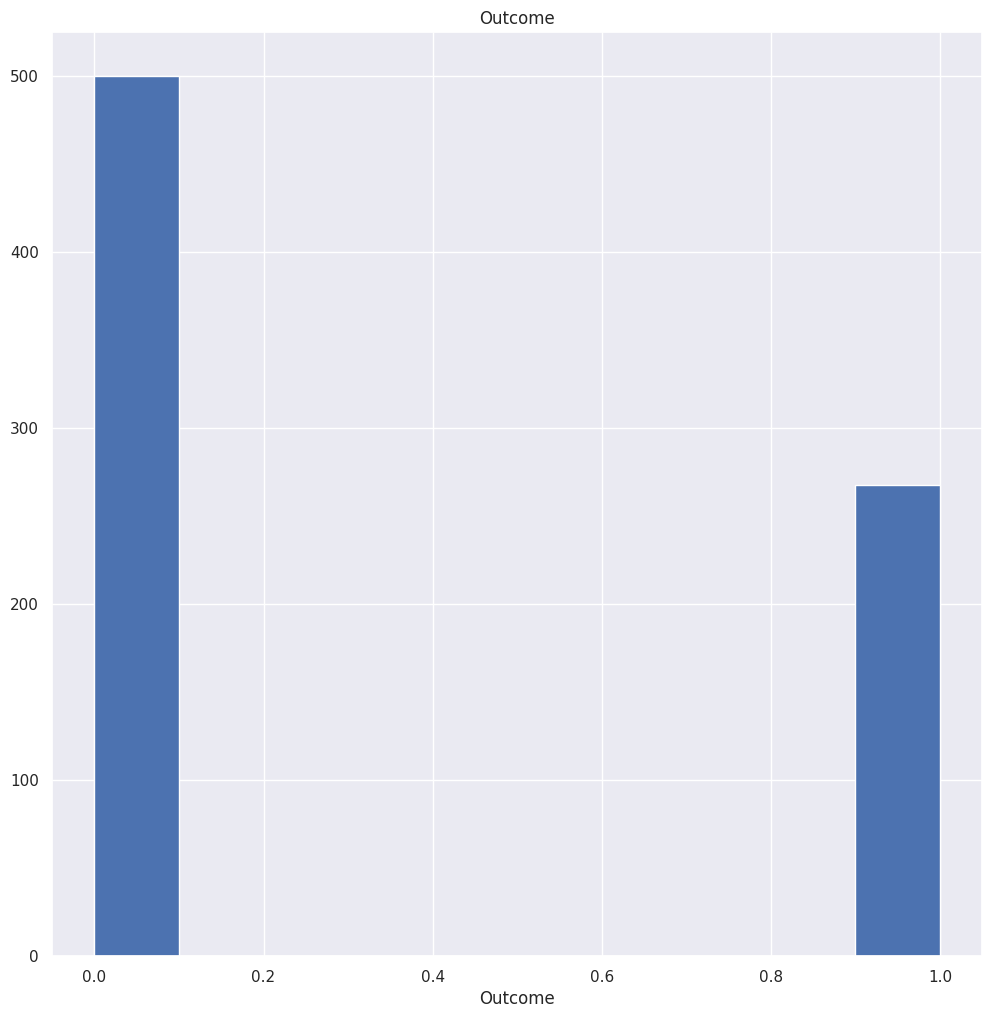

In [159]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist()
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

for col in num_but_cat:
  num_summary(df, col, True)

Step 4: Perform target variable analysis.
(The mean of the target variable according to the categorical variables, the mean of the numeric variables according to the target variable)

In [160]:

def target_summary_with_num(dataframe, target, num_col):
  print(dataframe.groupby(target).agg({num_col: "mean"}), end="\n\n\n")

print("----- num_cols -----")
for col in num_cols:
  target_summary_with_num(df, "Outcome", col)

print("----- num_but_cat -----")
for c in num_but_cat:
  target_summary_with_num(df, "Outcome", c)


----- num_cols -----
----- num_but_cat -----
         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164


         Outcome
Outcome         
0            0.0
1            1.0




Step 5: Perform outlier analysis.


In [161]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  iqr = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * iqr
  low_limit = quartile1 - 1.5 * iqr

  return up_limit, low_limit

def check_outlier(dataframe, col_name):
  up_limit, low_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

for col in num_cols:
  print(f"{col}: {check_outlier(df, col)}")

In [162]:
def grab_outliers(dataframe, col_name, index=False):
  up, low = outlier_thresholds(dataframe, col_name)

  if dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)].shape[0] > 10:
    print(dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)].head())
  else:
    print(dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)])

  if index:
    outlier_index = dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)].index
    return outlier_index

for col in num_cols:
  print(grab_outliers(df, col, True), end="\n\n\n")

Outlier analysis with LOF

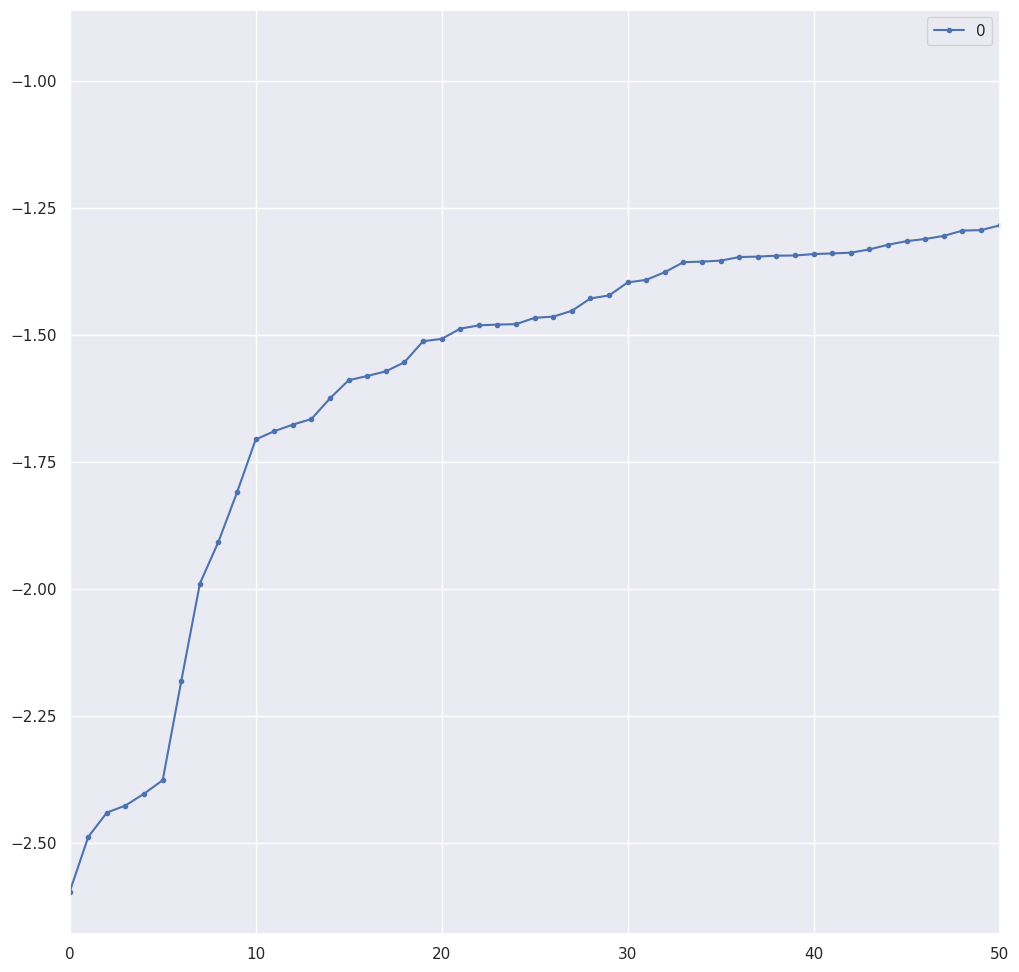

In [163]:

lof = LocalOutlierFactor(n_neighbors=20)
lof.fit_predict(df)

df_scores = lof.negative_outlier_factor_
df_scores[0:5]
np.sort(df_scores)[0:5]

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0,50], style='.-')
plt.show()

In [164]:
th = np.sort(df_scores)[11]
df[df_scores < th]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
75,1,0,48,20,0,24.7,0.140,22,0
106,1,96,122,0,0,22.4,0.207,27,0
182,1,0,74,20,23,27.7,0.299,21,0
228,4,197,70,39,744,36.7,2.329,31,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
459,9,134,74,33,60,25.9,0.460,81,0
502,6,0,68,41,0,39.0,0.727,41,1
537,0,57,60,0,0,21.7,0.735,67,0


Step 6: Perform missing observation analysis

In [165]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Step 7: Perform correlation analysis.

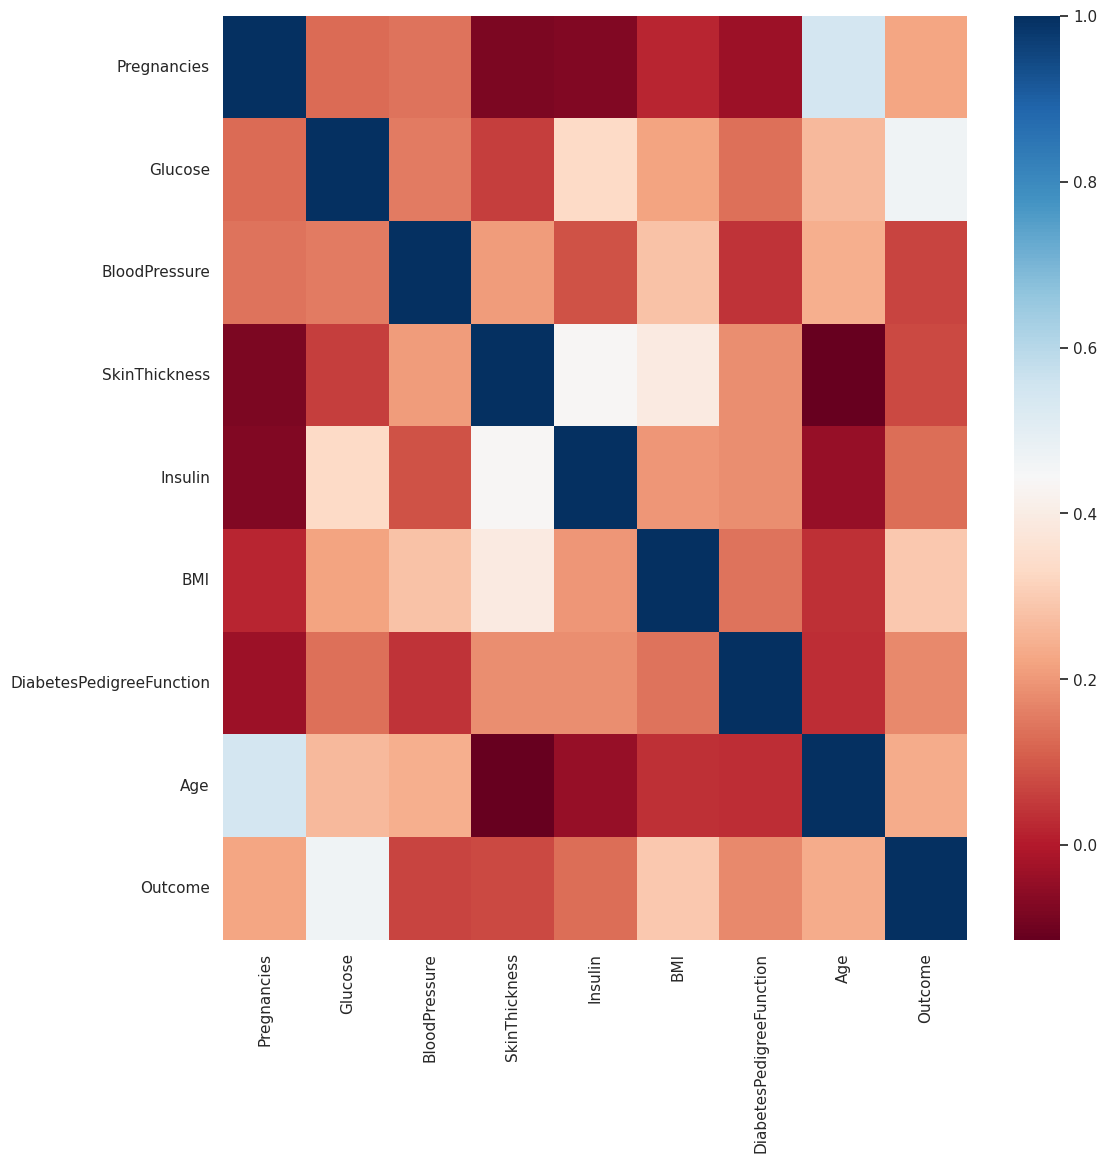

In [166]:
corr = df[num_but_cat].corr()

sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

#TASK 2: Feature Engineering


Step 1: Take necessary actions for missing and outlier values.


In [167]:
zero_columns = [col for col in df.columns if df[col].min()==0 and col not in ["Pregnancies", "Outcome"]]

for col in zero_columns:
  df[col] = np.where(df[col]==0, np.nan, df[col])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [168]:
def missing_values(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
  print(missing_df, end="\n")

  if na_name:
    return na_columns
na_columns = missing_values(df, True)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [169]:
def missing_vs_target(dataframe, target, na_columns):
  temp_df = dataframe.copy()

  for col in na_columns:
    temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1,0)

  na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

  for col in na_flags:
    print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(), "Count": temp_df.groupby(col)[target]}), end="\n\n")

missing_vs_target(df, "Outcome", na_columns)

                 TARGET_MEAN  \
Glucose_NA_FLAG                
0                   0.348624   
1                   0.400000   

                                                             Count  
Glucose_NA_FLAG                                                     
0                (0, [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,...  
1                                             (1, [0, 0, 0, 1, 1])  

                       TARGET_MEAN  \
BloodPressure_NA_FLAG                
0                         0.343793   
1                         0.457143   

                                                                   Count  
BloodPressure_NA_FLAG                                                     
0                      (0, [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,...  
1                      (1, [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,...  

                       TARGET_MEAN  \
SkinThickness_NA_FLAG                
0                         0.332717   
1                         

Filling in missing values

In [170]:

for col in zero_columns:
  df[col] = df[col].fillna(df.groupby("Outcome")[col].transform("median"))
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Solving the outlier problem with re-assignment with thresholds


In [171]:
def replace_with_thresholds(dataframe, col_name):
  up, low = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low), col_name] = low
  dataframe.loc[(dataframe[col_name] > up), col_name] = up

for col in num_cols:
  replace_with_thresholds(df, col)
for col in num_cols:
  print(col,check_outlier(df, col))
df["Age"]

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

Step 2: Create new variables.


In [172]:

# age range
df['Age_RANGE'] = pd.cut(x=df['Age'],
                      bins=[0, 18, 30, 50, np.inf],
                      labels=["Young", "Mature", "Middle-aged", "Senior"])

# BMI range
df['BMI_RANGE'] = pd.cut(x=df['BMI'],
                      bins=[0, 18.5, 24.9, 29.9, np.inf],
                      labels=["Underweight", "Healthy", "Overweight", "Obese"])

# Insulin range
df['Insulin_RANGE'] = pd.cut(x=df['Insulin'],
                          bins=[0, 100, 140, 199, np.inf],
                          labels=["Low", "Normal", "Pre-High", "High"])

# Glucose range
df['Glucose_RANGE'] = pd.cut(x=df['Glucose'],
                      bins=[0, 100, 140, 199, np.inf],
                      labels=["Low", "Normal", "Pre-Diabetes", "Diabetes"])

# Blood pressure range
df['BloodPressure_RANGE'] = pd.cut(x=df['BloodPressure'],
                                bins=[0, 80, 90, 120, np.inf],
                                labels=["Low", "Normal", "Pre-High", "High"])

print(df.dtypes)
df.head()

Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
Age_RANGE                   category
BMI_RANGE                   category
Insulin_RANGE               category
Glucose_RANGE               category
BloodPressure_RANGE         category
dtype: object


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_RANGE,BMI_RANGE,Insulin_RANGE,Glucose_RANGE,BloodPressure_RANGE
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Middle-aged,Obese,Pre-High,Pre-Diabetes,Low
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Middle-aged,Overweight,Normal,Low,Low
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Middle-aged,Healthy,Pre-High,Pre-Diabetes,Low
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Mature,Overweight,Low,Low,Low
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Middle-aged,Obese,Pre-High,Normal,Low


Step 3: Perform the encoding operations.


In [173]:
for col in cat_cols:
    cat_summary(df, col)

    Pregnancies      Ratio
1           135  17.578125
0           111  14.453125
2           103  13.411458
3            75   9.765625
4            68   8.854167
5            57   7.421875
6            50   6.510417
7            45   5.859375
8            38   4.947917
9            28   3.645833
10           24   3.125000
11           11   1.432292
13           10   1.302083
12            9   1.171875
14            2   0.260417
15            1   0.130208
17            1   0.130208
----------------------------------------
       Glucose     Ratio
99.0        17  2.213542
100.0       17  2.213542
125.0       14  1.822917
111.0       14  1.822917
106.0       14  1.822917
...        ...       ...
191.0        1  0.130208
177.0        1  0.130208
44.0         1  0.130208
62.0         1  0.130208
190.0        1  0.130208

[135 rows x 2 columns]
----------------------------------------
       BloodPressure     Ratio
70.0              76  9.895833
74.0              52  6.770833
78.0           

In [174]:
def one_hot_encoder(dataframe, cat_cols, drop_first=True):
  dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
  return dataframe

cat_cols, num_cols, num_but_cat = grap_col_names(df)
ohe_cols = [col for col in df.columns if df[col].dtypes == "category"]

df = one_hot_encoder(df, ohe_cols)
df.head()

Observations: 768
Variables: 14
cat_cols: 9
num_cols: 0
num_but_cat: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_RANGE_Mature,...,BMI_RANGE_Obese,Insulin_RANGE_Normal,Insulin_RANGE_Pre-High,Insulin_RANGE_High,Glucose_RANGE_Normal,Glucose_RANGE_Pre-Diabetes,Glucose_RANGE_Diabetes,BloodPressure_RANGE_Normal,BloodPressure_RANGE_Pre-High,BloodPressure_RANGE_High
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,...,1,0,1,0,0,1,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,1,0,0,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,1,0,1,0,1,0,0,0,0,0


Step 4: Standardize for numeric variables.


In [175]:
mms = MinMaxScaler()
df[num_but_cat] = mms.fit_transform(df[num_but_cat])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_RANGE_Mature,...,BMI_RANGE_Obese,Insulin_RANGE_Normal,Insulin_RANGE_Pre-High,Insulin_RANGE_High,Glucose_RANGE_Normal,Glucose_RANGE_Pre-Diabetes,Glucose_RANGE_Diabetes,BloodPressure_RANGE_Normal,BloodPressure_RANGE_Pre-High,BloodPressure_RANGE_High
0,0.352941,0.670968,0.489796,0.304348,0.186899,0.314928,0.234415,0.483333,1.0,0,...,1,0,1,0,0,1,0,0,0,0
1,0.058824,0.264516,0.428571,0.239130,0.106370,0.171779,0.116567,0.166667,0.0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.470588,0.896774,0.408163,0.271739,0.186899,0.104294,0.253629,0.183333,1.0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0,0,...,1,0,1,0,1,0,0,0,0,0


Model

In [176]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

Accuracy: 0.8896103896103896
Precision: 0.8903096903096903
Recall: 0.8896103896103896
F1 Score: 0.8879217216502752


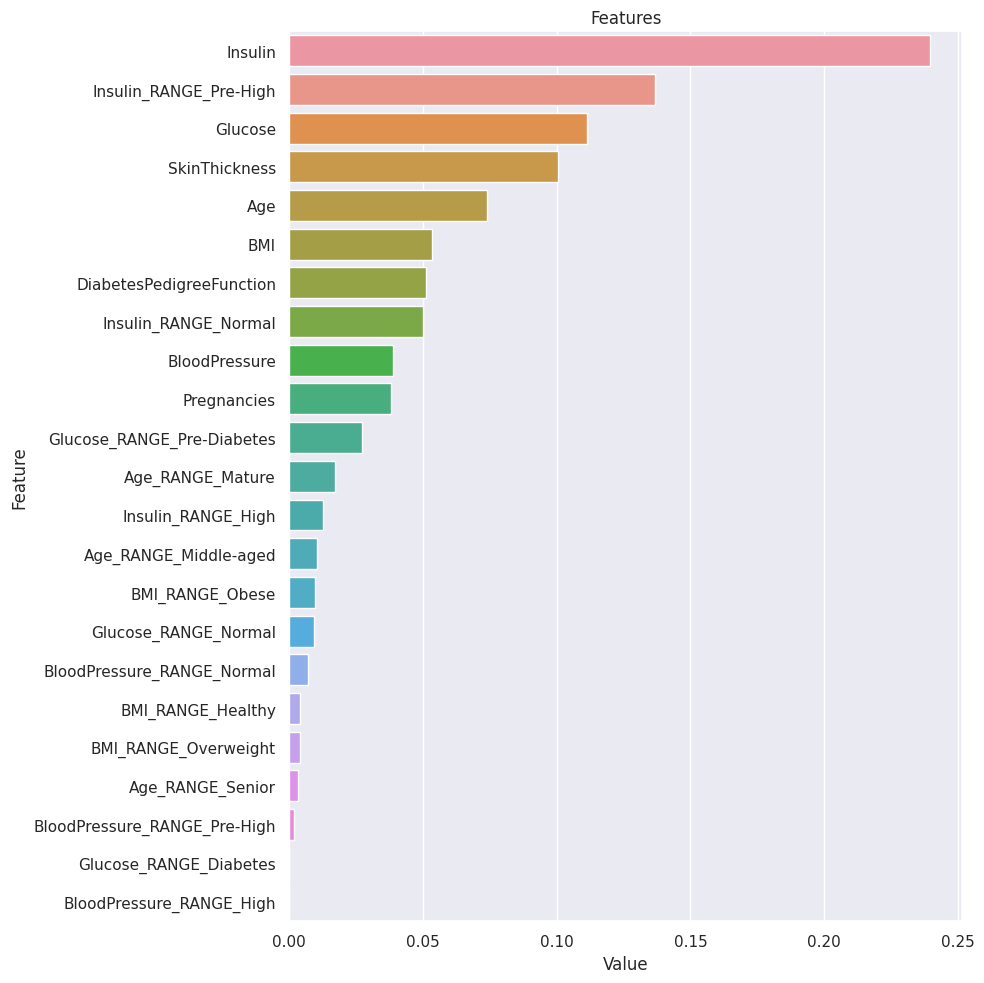

In [177]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)